# Importing Necessary Items

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Dataset Information

In [ ]:
'''
Columns:

CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s
'''

'\nColumns:\n\nCRIM: Per capita crime rate by town\nZN: Proportion of residential land zoned for lots over 25,000 sq. ft\nINDUS: Proportion of non-retail business acres per town\nCHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX: Nitric oxide concentration (parts per 10 million)\nRM: Average number of rooms per dwelling\nAGE: Proportion of owner-occupied units built prior to 1940\nDIS: Weighted distances to five Boston employment centers\nRAD: Index of accessibility to radial highways\nPTRATIO: Pupil-teacher ratio by town\nB: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town\nLSTAT: Percentage of lower status of the population\nMEDV: Median value of owner-occupied homes in $1000s\n'

# Loading the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df=pd.read_csv("/content/drive/MyDrive/Datasets/train.csv")
test_df=pd.read_csv("/content/drive/MyDrive/Datasets/test.csv")
submission_df=pd.read_csv("/content/drive/MyDrive/Datasets/submission_example.csv")

# Train Dataset


In [ ]:
# datatype info in train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [ ]:
#The describe() method returns description of the data in the DataFrame.
train_df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [ ]:
#Head() returns the first five samples of the dataset
train_df = train_df.drop('ID', axis=1)
train_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


# Test Dataset

In [ ]:
# datatype info in train dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       173 non-null    int64  
 1   crim     173 non-null    float64
 2   zn       173 non-null    float64
 3   indus    173 non-null    float64
 4   chas     173 non-null    int64  
 5   nox      173 non-null    float64
 6   rm       173 non-null    float64
 7   age      173 non-null    float64
 8   dis      173 non-null    float64
 9   rad      173 non-null    int64  
 10  tax      173 non-null    int64  
 11  ptratio  173 non-null    float64
 12  black    173 non-null    float64
 13  lstat    173 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 19.0 KB


In [ ]:
test_df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,258.404624,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,143.289788,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,3.000000,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,136.000000,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,268.000000,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,381.000000,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,505.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


In [ ]:
test_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


# Exploratory Data Analysis

'\nResult :- crim,zn,black has so many outliers that means those columns does not have uniform distribution\nHence in order to make them as uniform distribution we will convert those values to log transformation\nor even we can use min-max normalisation.\nEven we can use Interquartile range method to remove the outliers\n'

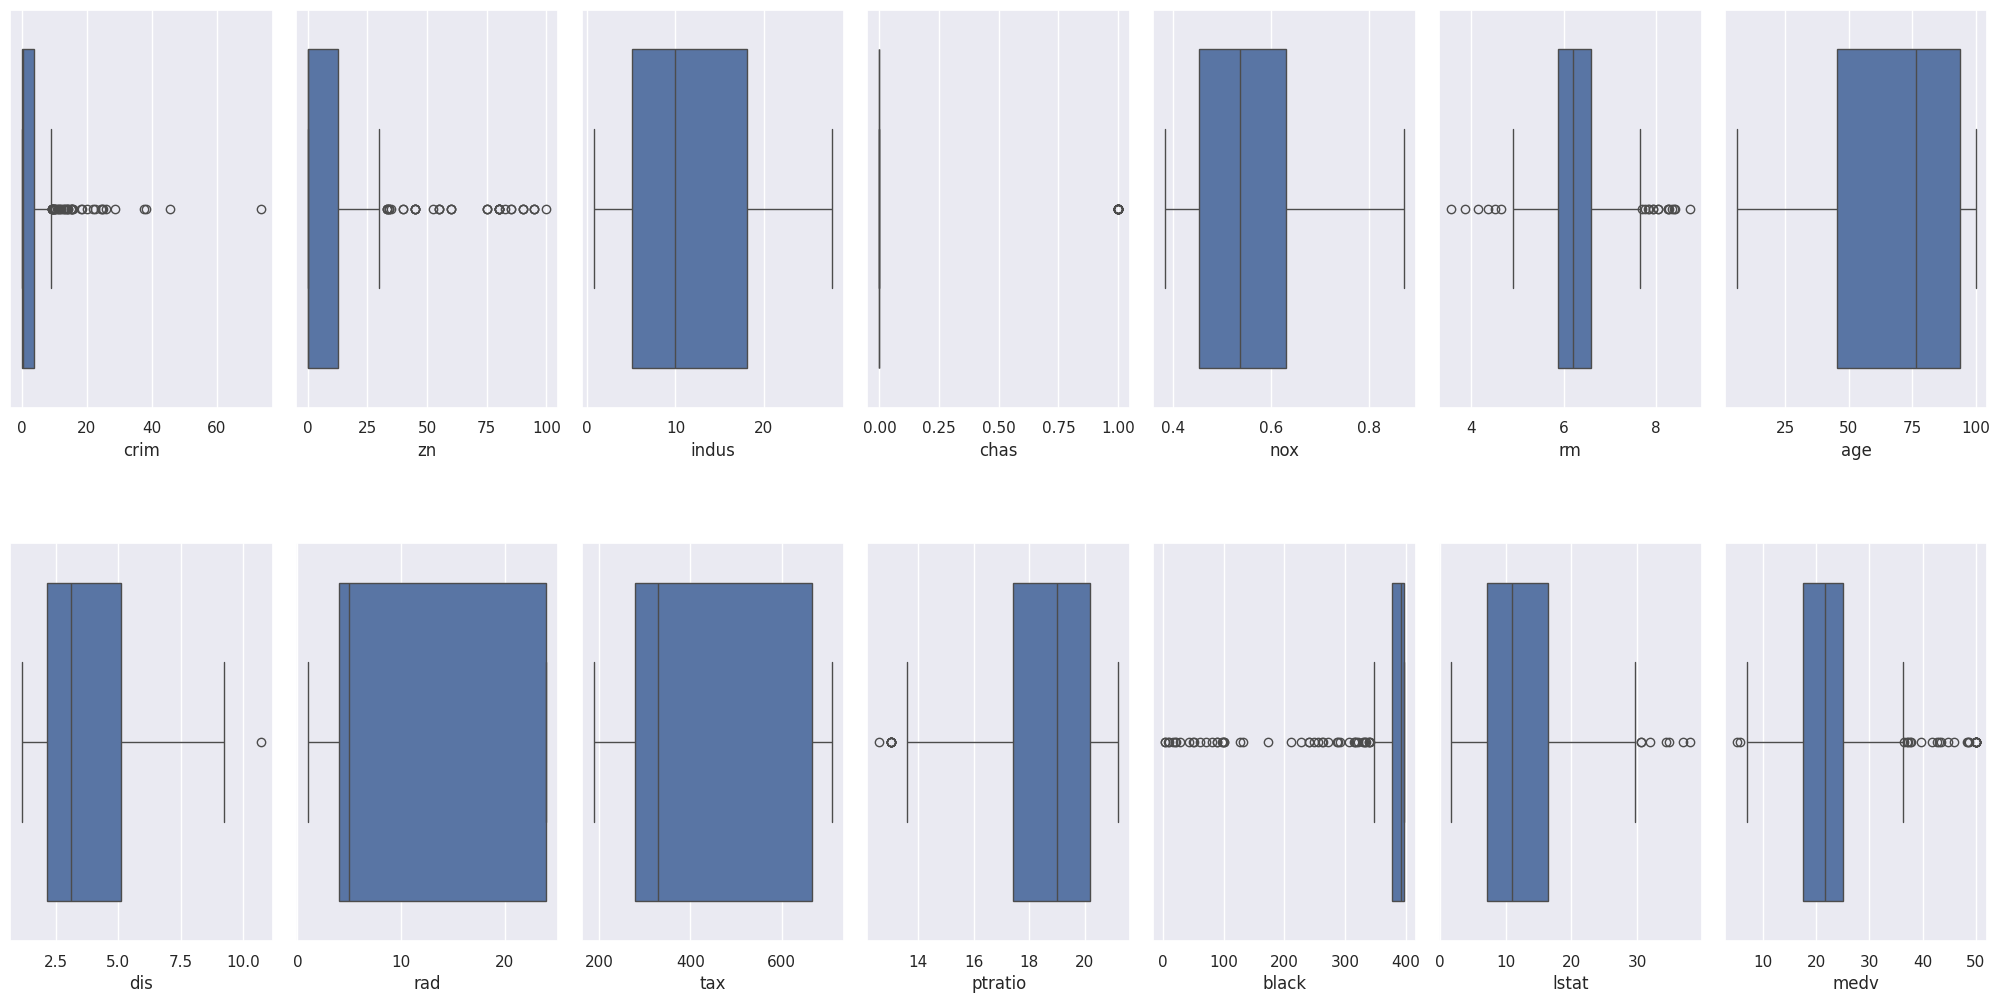

In [ ]:
#Creating Box plots for all the attributes that we have which will help us to identify the outliers from the dataset
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index=0 #to traverse the subplot
ax=ax.flatten()

# use to set style of background of plot
sns.set(style="darkgrid")

for col, value in train_df.items():
    sns.boxplot(x=col, data=train_df, ax=ax[index])
    index += 1

#Did Hyperparameter tuning to display the graph properly
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

'''
Result :- crim,zn,black has so many outliers that means those columns does not have uniform distribution
Hence in order to make them as uniform distribution we will convert those values to log transformation
or even we can use min-max normalisation.
Even we can use Interquartile range method to remove the outliers
'''

In [ ]:
train_df.shape

(333, 14)

In [ ]:
#Removing the outliers
train_df=train_df[~((train_df['crim']>=25))]
train_df=train_df[~((train_df['rm']>=8.5)|(train_df['rm']<4))]
train_df=train_df[~((train_df['lstat']>=30))]

In [ ]:
train_df.shape

(318, 14)

'\nBy visualisation we can see that crim,zn,tax and black has large range of values\nand they are skewed at one side so using min-max normalisation we will try to\nnormalise those value in smaller range\n'

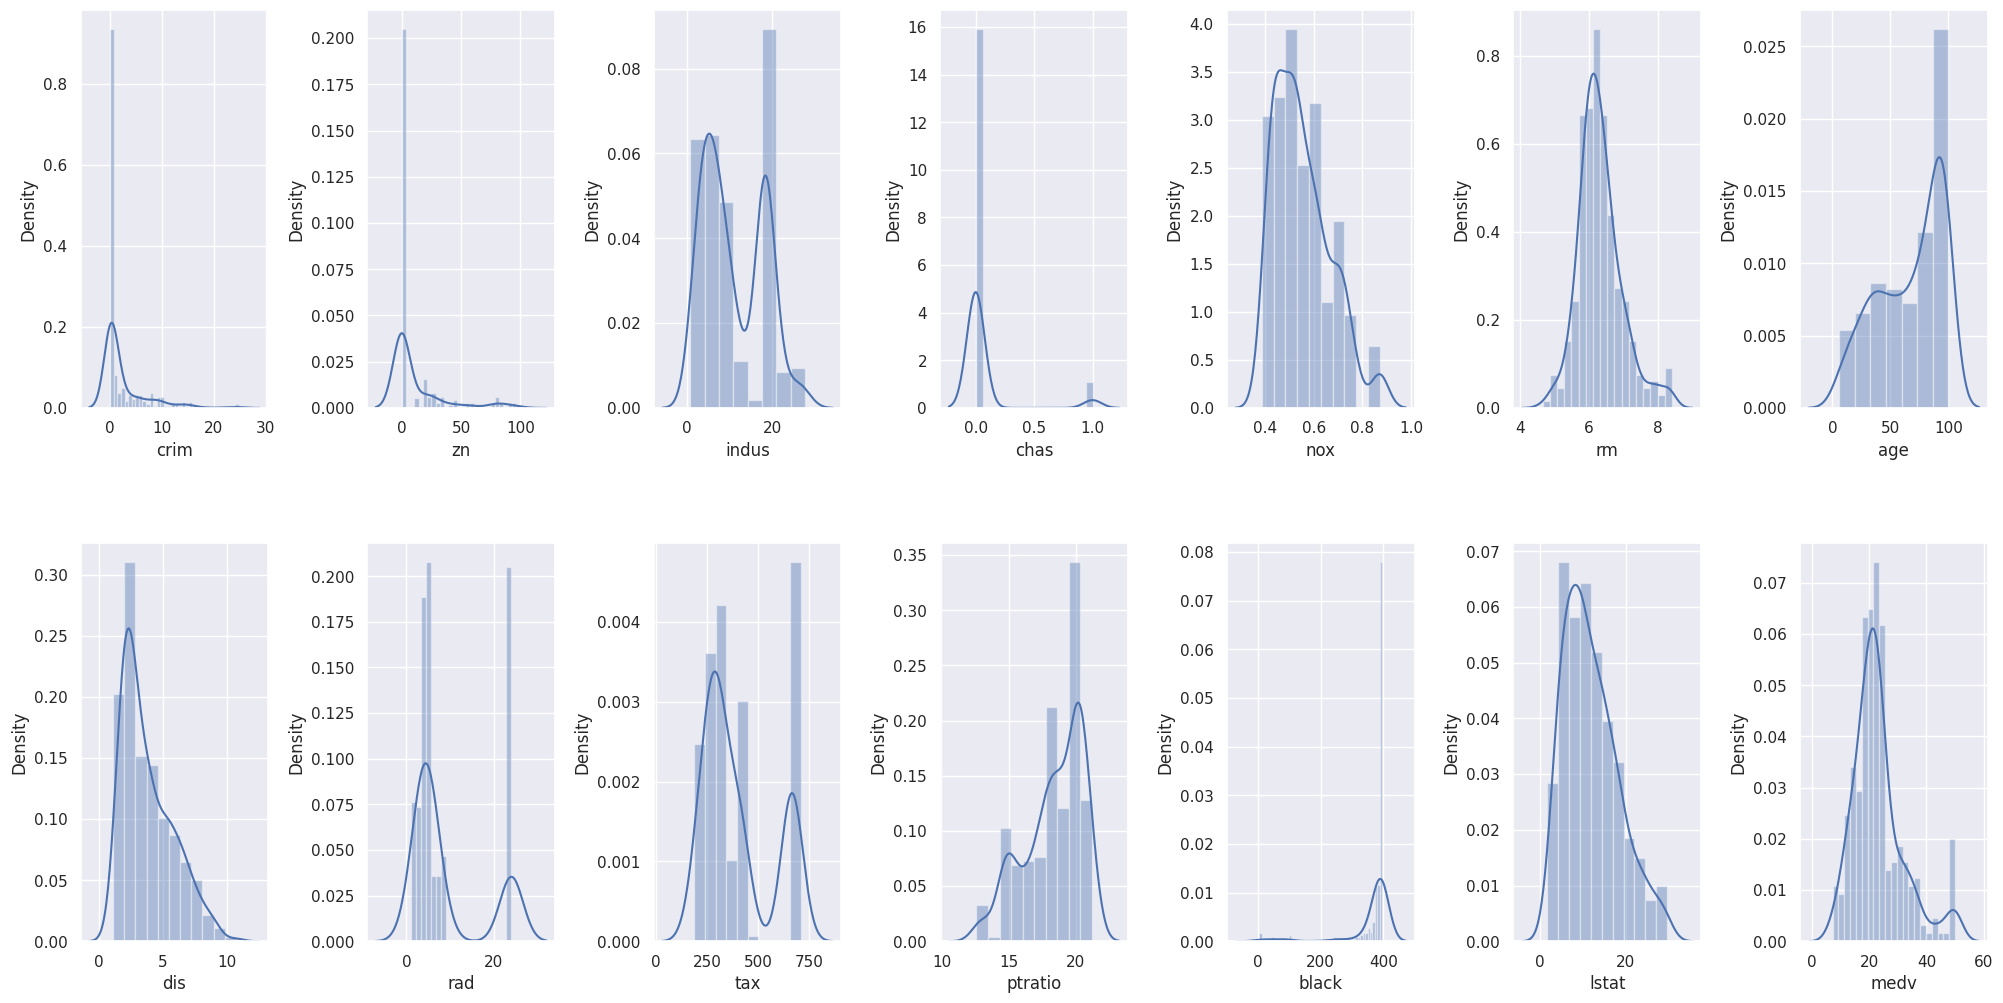

In [ ]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in train_df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

'''
By visualisation we can see that crim,zn,tax and black has large range of values
and they are skewed at one side so using min-max normalisation we will try to
normalise those value in smaller range
'''

# Correlation Matrix

'\nValues close to +1 indicates strong positive correlation, -1 indicates a strong negative correlation and 0 indicates suggests no linear correlation.\nDarker colors signify strong correlation, while light colors represents weaker correlations.\nPositive correlation variable move in same directions. As one increases, the other also increases.\nNegative correlation variable move in opposite directions. An increase in one variable is associated with a decrease in the other.\n'

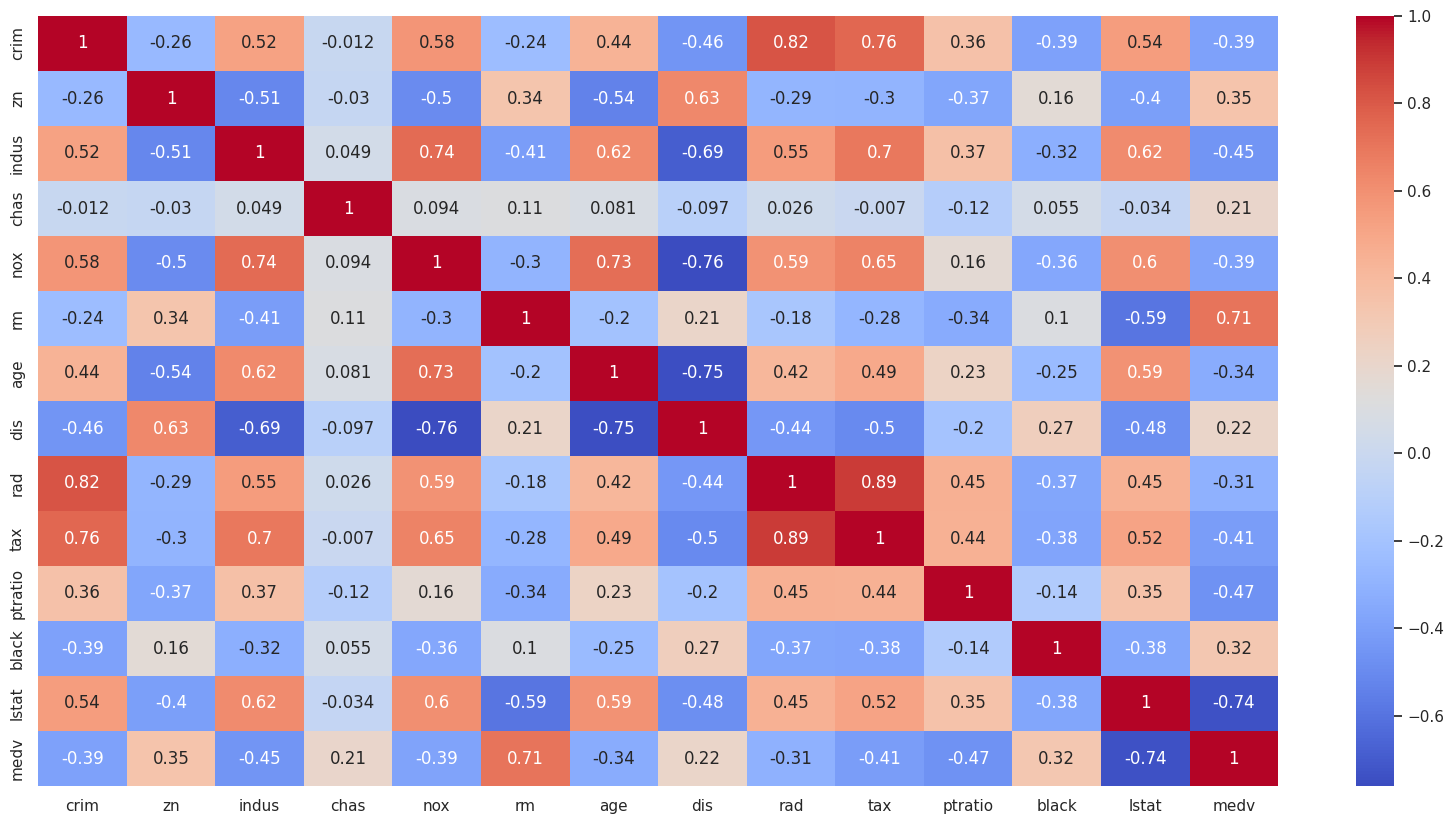

In [ ]:
corr = train_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

'''
Values close to +1 indicates strong positive correlation, -1 indicates a strong negative correlation and 0 indicates suggests no linear correlation.
Darker colors signify strong correlation, while light colors represents weaker correlations.
Positive correlation variable move in same directions. As one increases, the other also increases.
Negative correlation variable move in opposite directions. An increase in one variable is associated with a decrease in the other.
'''

<Axes: xlabel='lstat', ylabel='medv'>

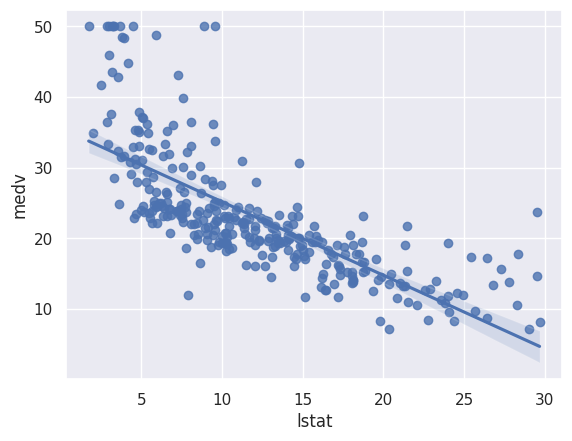

In [ ]:
''' We need to see the columns which are highly correlated with target attribute i.e "medv"
We can see that "lstat" has -0.74 that means it is negatively highly correlated means increase in medv value there will be decrease in lstat values

'''

sns.regplot(y=train_df['medv'], x=train_df['lstat'])

<Axes: xlabel='rm', ylabel='medv'>

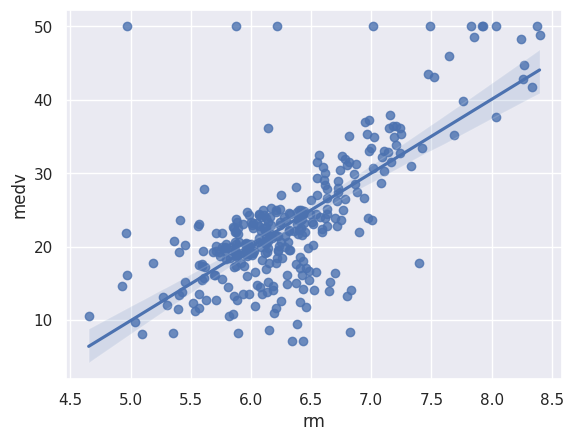

In [ ]:
# SImilarly We can see that "rm" has 0.69 that means it is positively highly correlated means increase in medv value there will be increase in rm values
sns.regplot(y=train_df['medv'], x=train_df['rm'])

In [ ]:
#We also droped "rad" column because it was highly correlated with the "tax" column so in order to perform model in better way we need to drop anyone of thaose two column

X_df=train_df.drop(columns=['medv', 'rad'], axis=1)
X=X_df.values
Y_df = train_df[['medv']]
y=Y_df.values

# Model Training

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

#Made the general function for training the model
def train(model, X, y):
    # train the model
    model.fit(X, y)

In [ ]:
#Traininig model using Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)

# predict the training set
pred = model.predict(X)
print("Model Report")
print("Root Mean Square Error : ",np.sqrt(mean_squared_error(y,pred)))



Model Report
Root Mean Square Error :  4.53679584704892


In [ ]:
print("Intercept : ", model.intercept_)
print("Slope : ", model.coef_)

Intercept :  [15.70911545]
Slope :  [[ 3.11091418e-02  2.82778528e-02  2.69303680e-02  4.14756337e+00
  -8.98396110e+00  5.27168793e+00 -1.82522475e-02 -1.30076889e+00
  -5.40943099e-04 -6.79729967e-01  1.20668279e-02 -6.16202870e-01]]


In [ ]:
#prediction on the training data itself
pred = model.predict(X)
print("Predicted Values :\n",pred)

Predicted Values :
 [[30.75895441]
 [24.56236985]
 [29.94323064]
 [29.13120119]
 [21.42865102]
 [16.84970202]
 [19.74773632]
 [19.34404426]
 [20.48355139]
 [19.72779364]
 [20.10085294]
 [22.20182119]
 [16.11923942]
 [10.91748805]
 [17.49401426]
 [15.47885448]
 [12.68822962]
 [14.19759424]
 [10.00312377]
 [17.96110783]
 [12.64441583]
 [22.59087223]
 [30.94504993]
 [34.758097  ]
 [25.58651594]
 [24.93971811]
 [22.21718049]
 [20.78277222]
 [18.91284157]
 [15.56594455]
 [14.87252361]
 [19.18454994]
 [22.12662079]
 [22.92088582]
 [15.97784534]
 [30.69358747]
 [24.80170106]
 [31.14910578]
 [21.12840144]
 [15.26735994]
 [15.48660821]
 [22.33727565]
 [23.89562868]
 [29.50729733]
 [23.18088074]
 [21.45363698]
 [16.61128241]
 [26.39672135]
 [25.34537291]
 [24.9161799 ]
 [27.22199392]
 [24.78050845]
 [22.80865681]
 [23.75749609]
 [29.00992377]
 [26.5625857 ]
 [24.37316532]
 [24.53845463]
 [27.9543307 ]
 [21.07046768]
 [25.01380906]
 [31.47721945]
 [32.15611058]
 [27.06720169]
 [28.62342567]
 [25.

In [ ]:
X_test=test_df.drop(columns=['ID', 'rad'], axis=1)
Y_test_pred = model.predict(X_test)
print("Predicted Value : \n", Y_test_pred)

Predicted Value : 
 [[32.01451349]
 [25.30844491]
 [17.10293371]
 [ 7.24406699]
 [16.70993762]
 [16.85376236]
 [18.42795225]
 [15.18118417]
 [12.32607278]
 [15.00318694]
 [20.19448006]
 [21.96766842]
 [ 7.10929159]
 [13.10593839]
 [22.67250938]
 [20.99036742]
 [22.53702445]
 [29.44422942]
 [ 4.4760854 ]
 [27.57189435]
 [19.41817683]
 [22.98369038]
 [20.8641449 ]
 [21.76694051]
 [21.61365886]
 [22.81776686]
 [25.91187298]
 [27.25401542]
 [28.17324439]
 [28.95387758]
 [38.20714236]
 [37.96064755]
 [33.78942897]
 [21.71762099]
 [17.80316292]
 [21.64670624]
 [19.92718894]
 [20.05640714]
 [19.62431749]
 [20.97144493]
 [14.97416505]
 [22.54299906]
 [22.64393258]
 [19.23316785]
 [14.59272649]
 [12.00200147]
 [ 7.33987989]
 [15.92225613]
 [18.77942796]
 [21.77888764]
 [22.9188167 ]
 [34.56785261]
 [44.99680218]
 [26.23387092]
 [19.31071383]
 [22.67240839]
 [32.50459437]
 [40.77706827]
 [36.20172228]
 [34.43458592]
 [31.5575724 ]
 [38.71851707]
 [15.88124708]
 [14.83684622]
 [21.75979665]
 [22.